In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [35]:
df.drop(columns='Unnamed: 0', axis = 1, inplace = True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
19995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


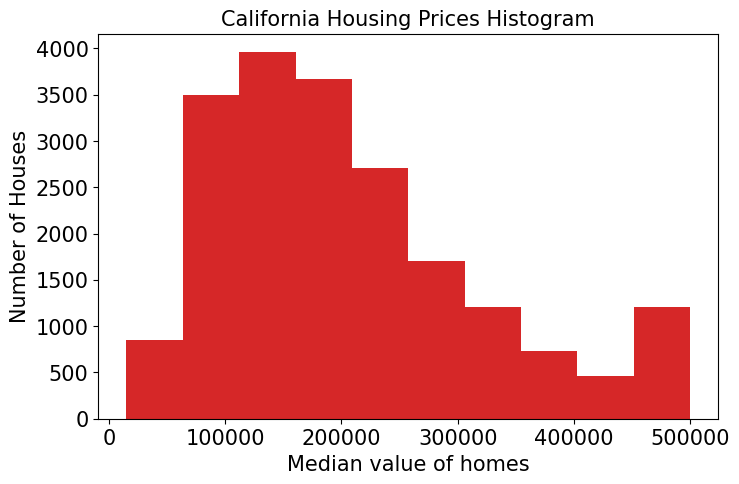

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df['median_house_value'], color = 'Tab:red')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of homes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

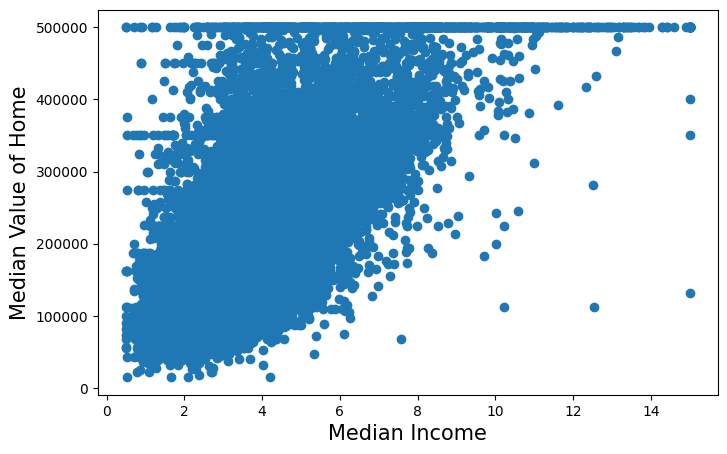

In [37]:
plt.figure(figsize = (8, 5))
plt.scatter(x = df['median_income'], y = df['median_house_value'], color = 'Tab:blue')
plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('Median Value of Home', fontsize = 15)
plt.show()

In [38]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [40]:
features_names = df.columns.to_list()[:-1]
X = df[features_names] # features
Y = df['median_house_value'] # response or target variable

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [42]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [43]:
pred = my_linear_regression.predict(X_test)
pred

array([249074.2339777 ,  67429.35551381, 103466.87085187, ...,
       319063.94385354,  61928.32004022, 298212.23633466])

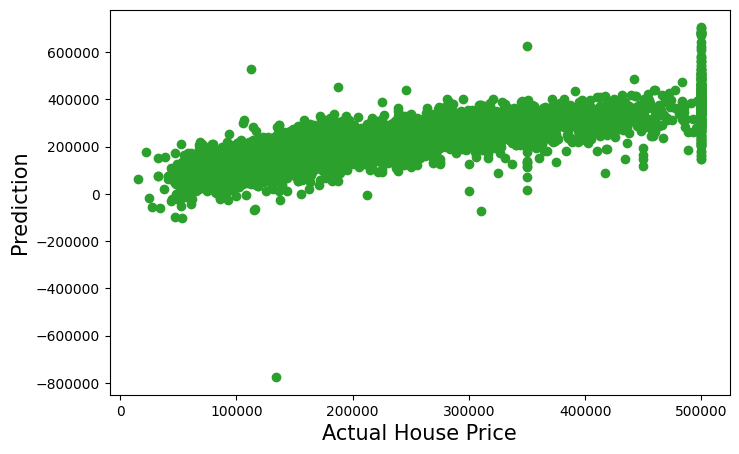

In [44]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [45]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.6395311942579177


In [46]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -3573609.8307387773
The coef (b_1) is  -42699.97834623054
The coef (b_2) is  -42720.951500028095
The coef (b_3) is  1163.2780605483397
The coef (b_4) is  -7.441160578317067
The coef (b_5) is  108.50838240524263
The coef (b_6) is  -43.114497553473484
The coef (b_7) is  61.10019838441531
The coef (b_8) is  40228.60724982529


In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(Y_test, pred)*100, "%")

Mean Absolute Error: 50374.121297888785
Mean Squared Error: 4847397446.398424
Root Mean Squared Error: 69623.25363266518
MAPE: 29.67005223635856 %


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [49]:
df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.229084,0.513284,0.509804,0.102359,0.102421,0.042994,0.099490,0.421277,0.679793
1,0.602590,0.182784,0.823529,0.039752,0.047952,0.022590,0.045387,0.213728,0.332990
2,0.651394,0.131775,0.509804,0.094556,0.078523,0.041509,0.081237,0.365064,0.526804
3,0.596614,0.136026,0.529412,0.001713,0.002173,0.001289,0.001644,0.388684,0.649484
4,0.466135,0.402763,0.352941,0.032661,0.037709,0.023739,0.038809,0.168108,0.137527


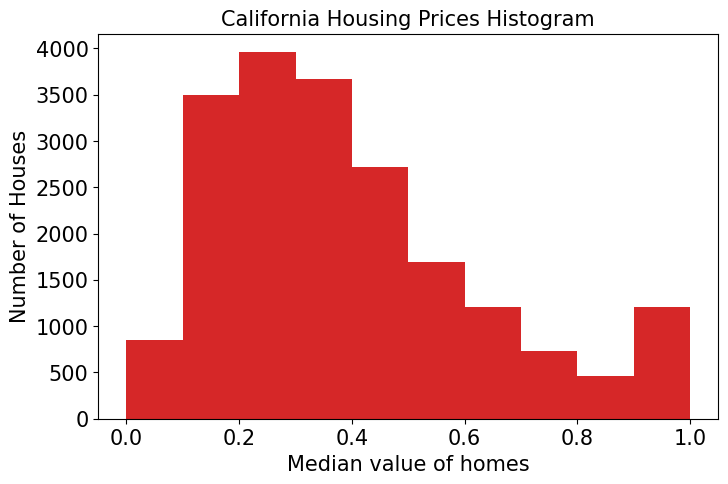

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df_norm.median_house_value, color = 'Tab:red')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of homes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [52]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features_names] # features
Y = df_norm['median_house_value'] # response or target variable
my_linear_regression.fit(X, Y)

LinearRegression()

In [53]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,longitude,-0.892046
1,latitude,-0.830818
2,housing_median_age,0.121552
3,total_rooms,-0.654970
4,total_bedrooms,1.518356
5,population,-2.813896
6,households,0.599498
7,median_income,1.206688


In [54]:
df.drop(columns='population', axis = 1, inplace = True)
df.drop(columns='longitude', axis = 1, inplace = True)
df

,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
0,37.37,27.0,3885.0,661.0,606.0,6.6085,344700.0
1,34.26,43.0,1510.0,310.0,277.0,3.5990,176500.0
2,33.78,27.0,3589.0,507.0,495.0,5.7934,270500.0
3,33.82,28.0,67.0,15.0,11.0,6.1359,330000.0
4,36.33,19.0,1241.0,244.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...
19995,40.58,52.0,2217.0,394.0,369.0,2.3571,111400.0
19996,40.69,36.0,2349.0,528.0,465.0,2.5179,79000.0
19997,41.84,17.0,2677.0,531.0,456.0,3.0313,103600.0
19998,41.80,19.0,2672.0,552.0,478.0,1.9797,85800.0


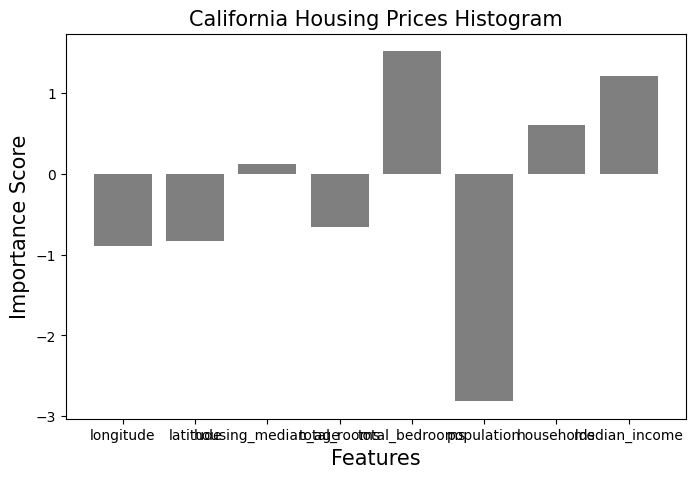

<Figure size 2000x1000 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:gray') 
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.figure(figsize = (20,10))
plt.show()